In [1]:
# Loading the necessary Libraries which will be used further
!pip install tensorflow  matplotlib tensorflow-datasets ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
# Importing Libraries
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

2024-08-18 02:54:08.785037: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 02:54:08.785161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 02:54:08.912737: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Loading the fashion-Mnist dataset from tensorflow
df = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteRLGWN9/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteRLGWN9/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
# Iterating using numpy to see the size of an image
df.as_numpy_iterator().next()['image'].shape

(28, 28, 1)

In [5]:
dataiterator = df.as_numpy_iterator()
# Gives different data every time
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [6]:
# It squeeze the image dimesion from (28,28,1) to (28,28)
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

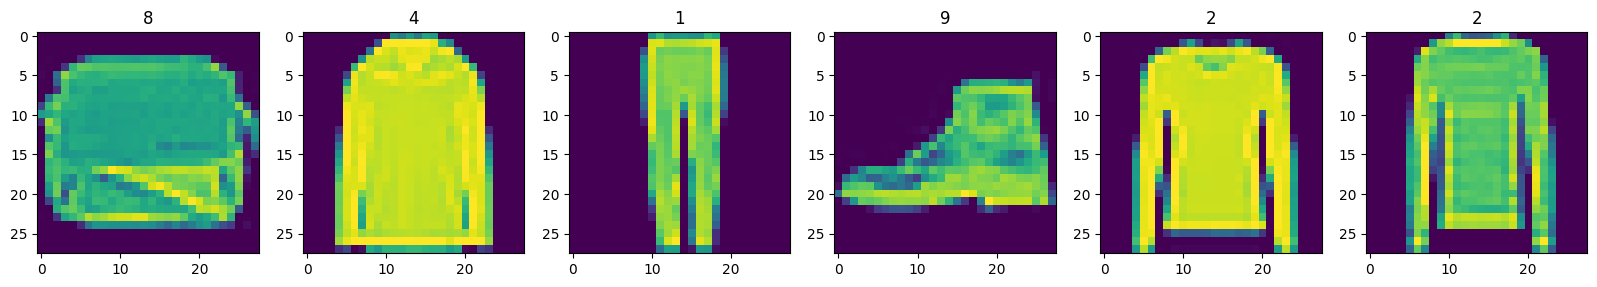

In [7]:
# Plotting any random 6 images from dataset
fig , ax = plt.subplots(ncols = 6 , figsize=(20,20))

for idx in range(6):
    batch = dataiterator.next()
    ax[idx].imshow(np.squeeze(batch['image']))
    ax[idx].title.set_text(batch['label'])

In [8]:
# Scaling image between -1 to 1
def scale_image(data):
    image = data['image']
    return image / 255

In [9]:
# M-map C-cache S-shuffle B-batch P-prefetch rule for tensorflow
df = tfds.load('fashion_mnist' , split = 'train')
df = df.map(scale_image)
df = df.cache()
df = df.shuffle(6000)
df = df.batch(128)
df = df.prefetch(64)

In [10]:
# Each element in dataset is of batch 128 
df.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [11]:
# Importing models and layers for Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Flatten , Reshape , LeakyReLU , Dropout , UpSampling2D 

In [35]:
def build_generator():
    
#     Sequential Models initialization
    model = Sequential()
    
    
#     First layer of model
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    
#     Second Layer consist of Upsampling the image and further Convolution
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
#     Third Layer
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
#     Fourth Layer before this layer we get our desired output shape (28 ,28) so now we are only capturing features afterhand
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
#     fifth layer for capturing features
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

#   final layer using sigmoid for generating images array in the range of [0,1]    
    model.add(Conv2D(1,4,padding='same' , activation='sigmoid'))
    
    return model

In [13]:
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [14]:
# Predicting images using noise/latent vectors
img = generator.predict(np.random.rand(4,128,1))
img.shape

1/1 [==============================] - 2s 2s/step


(4, 28, 28, 1)

1/1 [==============================] - 0s 19ms/step
Image shape:  (4, 28, 28, 1)


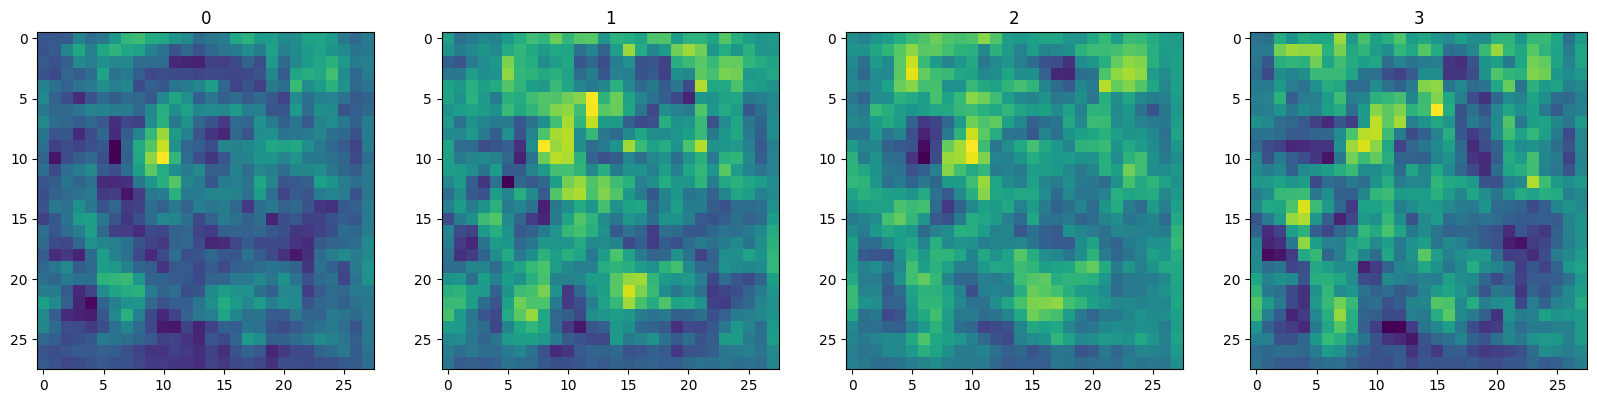

In [15]:
# Looping over the generated images using generator
img = generator.predict(np.random.rand(4,128,1))
print(f'Image shape: ' , img.shape)
fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))

for idx , img in enumerate(img):
    
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)


In [16]:
def build_discriminator():
    model = Sequential()
    
#     Using convolution layer in discriminator for image classification (real/fake)
    model.add(Conv2D(32,5,input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    
#     Second layer
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
#     Third Layer
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
#     Fourth Layer
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
#     Fifth Layer using Flattening and feeding it to dense layer followed by sigmoid to check if the image is real or fake. Real if 1 fake if 0
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    
    return model 

In [17]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [18]:
# Generating images using generator and passing it to discriminator for fake/real check
img = generator.predict(np.random.rand(4,128,1))
discriminator.predict((img))

1/1 [==============================] - 0s 296ms/step


array([[0.50256807],
       [0.5025165 ],
       [0.50250345],
       [0.50259894]], dtype=float32)

In [19]:
# Importing optimizers and Loss Function
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [20]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [21]:
from tensorflow.keras.models import Model

In [22]:
# Defining Latent vectors
latent_dim = 128

In [23]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = 0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [24]:
#  Model
fashiongan = FashionGAN(generator, discriminator)

In [25]:
# Compiling
fashiongan.compile(g_opt , d_opt , g_loss , d_loss)

In [26]:
import os 
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [27]:
# For saving the images
class ModelMonitor(Callback):
    def __init__(self, num_img=1, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/kaggle/working', f'generated_img_{epoch}.png'))

In [28]:
hist = fashiongan.fit(df, epochs=20 , callbacks =[ModelMonitor()])

Epoch 1/20


2024-08-18 02:55:19.743638: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1723949724.963800     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 87s 158ms/step - d_loss: 0.4432 - g_loss: 1.8026
Epoch 2/20
469/469 [==============================] - 77s 163ms/step - d_loss: 0.5091 - g_loss: 4.9969
Epoch 3/20
469/469 [==============================] - 77s 165ms/step - d_loss: 0.6677 - g_loss: 0.8552
Epoch 4/20
469/469 [==============================] - 77s 165ms/step - d_loss: 0.7035 - g_loss: 0.6613
Epoch 5/20
469/469 [==============================] - 77s 165ms/step - d_loss: 0.6927 - g_loss: 0.7087
Epoch 6/20
469/469 [==============================] - 77s 165ms/step - d_loss: 0.6906 - g_loss: 0.7426
Epoch 7/20
469/469 [==============================] - 77s 165ms/step - d_loss: 0.6795 - g_loss: 0.8088
Epoch 8/20
469/469 [==============================] - 77s 165ms/step - d_loss: 0.6913 - g_loss: 0.7497
Epoch 9/20
469/469 [==============================] - 77s 165ms/step - d_loss: 0.6821 - g_loss: 0.7793
Epoch 10/20
469/469 [==============================] - 77s 165ms/step - d_loss: 0.68

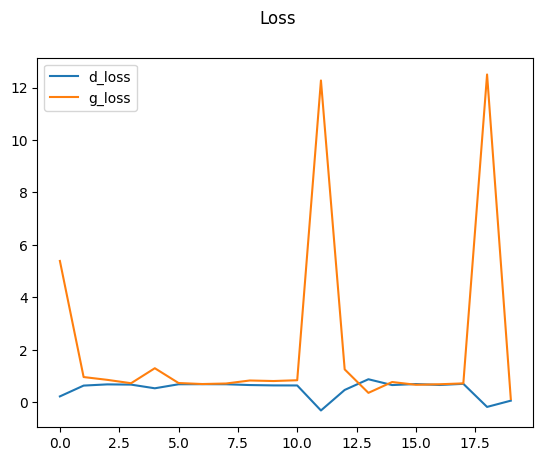

In [29]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()

In [30]:
imgs = generator.predict(tf.random.normal((4, 128, 1)))

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
Image shape:  (4, 28, 28, 1)


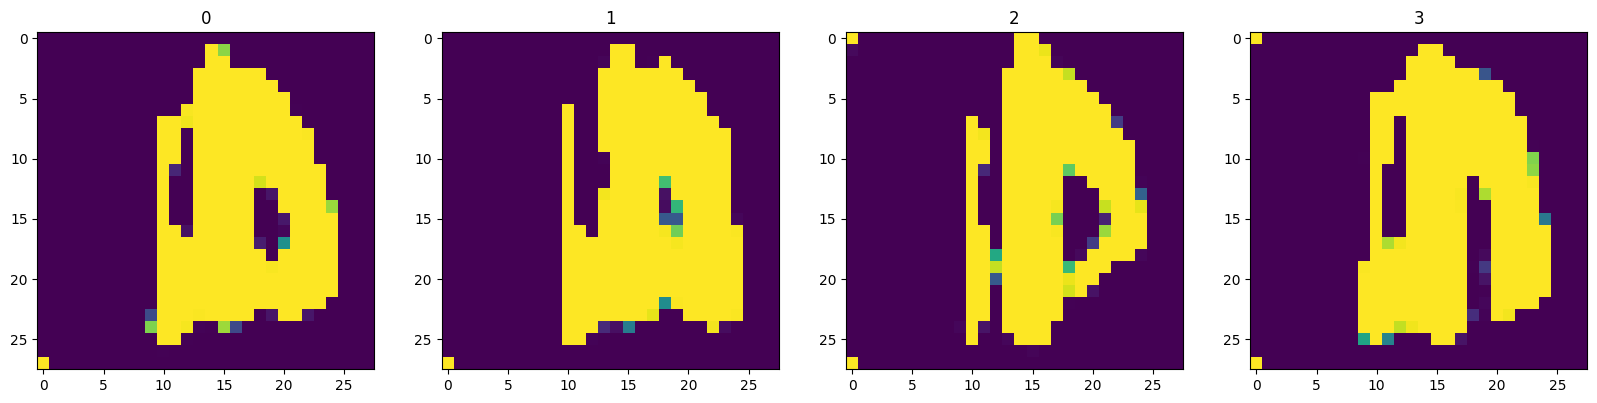

In [33]:
img = generator.predict(np.random.rand(4,128,1))
print(f'Image shape: ' , img.shape)
fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))

for idx , img in enumerate(img):
    
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

# The images are not clear enough because we have only trained for 20 loops we need minimum 100 loops for a better looking image and we also have the pretrained weights of generator model from github in the below cell so we can load that weights and plot our model

In [37]:
# generator.load_weights('/kaggle/input/generator-weights-for-fashion/generatormodel.h5')
# img = generator.predict(np.random.rand(4,128,1))
# print(f'Image shape: ' , img.shape)
# fig , ax = plt.subplots(ncols = 4 , figsize=(20,20))

# for idx , img in enumerate(img):
    
#     ax[idx].imshow(np.squeeze(img))
#     ax[idx].title.set_text(idx)